# 室内场景三维重建 - 课程大作业

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
# 导入必要的库
import cv2
from pathlib import Path
from process import *
import process.feature_extraction as fe
import process.feature_matching as fm
from util import *

In [3]:
# 初始化数据保存路径
data_path = Path.cwd() / "data"

## Step0: 导入图像及相机参数

In [4]:
# 是否重新生成数据
regenerate = False
cache_key = "images_and_intrinsics"

images, camera_intrinsic = cache_wrapper(cache_key, regenerate, load_images_and_camera_intrinsic)(data_path)

### 测试：展示图像和相机参数

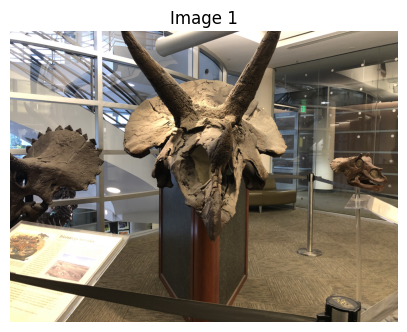

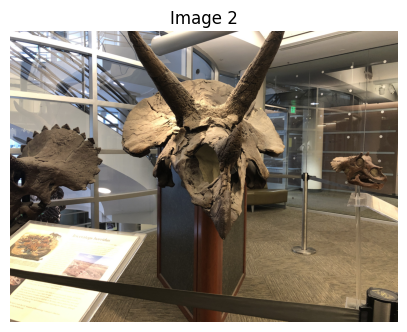

相机内参矩阵:
[[3.2256e+03 0.0000e+00 2.0160e+03]
 [0.0000e+00 3.2256e+03 1.5120e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00]]


In [5]:
# 展示读取的图像
for i, img in enumerate(images[:2]):
    plt_show(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), f"Image {i+1}")

# 展示相机内参
print("相机内参矩阵:")
print(camera_intrinsic)

## Step1: 图像特征提取 (SIFT)

In [ ]:
regenerate = False
data_cache_key = "sift"

# 运行SIFT特征提取
features = cache_wrapper(
    data_cache_key,
    regenerate,
    extract_features,
    fe.after_load,
)(images)

100%|██████████| 62/62 [02:11<00:00,  2.13s/it]


数据已保存到缓存: sift


### 测试：展示图像特征点

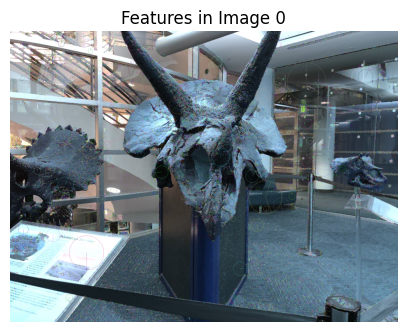

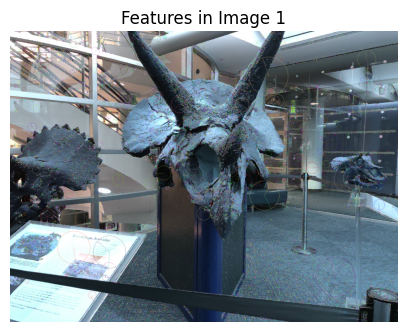

In [21]:
# 展示特征点
for i, img in enumerate(images[:2]):
    img_with_features = cv2.drawKeypoints(
        img, features[i][0], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt_show(img_with_features, f"Features in Image {i}")

## Step2: 图像特征匹配

In [34]:
# 是否要重新生成该部分数据
regenerate = False
data_cache_key = "matches"

# 运行特征匹配
all_matches = cache_wrapper(data_cache_key, regenerate, match_all_paires, fm.after_load)(features)

### 测试：展示匹配结果

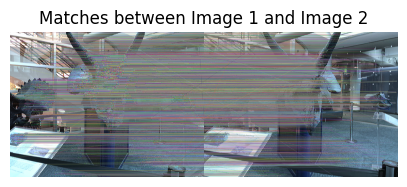

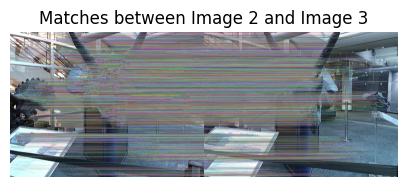

In [35]:
for i, (img1, img2) in enumerate(zip(images[:2], images[1:3])):
    img_matches = visualize_matches(
        img1, img2, all_matches[(i, i + 1)], features[i], features[i + 1]
    )
    plt_show(img_matches, f"Matches between Image {i+1} and Image {i+2}")

## Step3: 场景初始化 (对极几何)

In [ ]:
# 是否要重新生成该部分数据
regenerate = False
data_cache_key = "init_recon"

## Step4: 场景重建 (PnP)

In [ ]:
# 是否要重新生成该部分数据
regenerate = False
data_cache_key = "pnp"

## Step5: 场景优化 (Bundle Adjustment)

In [ ]:
# 是否要重新生成该部分数据
regenerate = False
data_cache_key = "ba"